In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
SIMILARITY_THRESHOLD=0.5

In [4]:
def load_similarity_df(video_name, vos_method):
    similarity = pd.read_json(f"similarity-out/{vos_method}/{video_name}/{video_name}.json", orient="records")
    similarity["frame_id"] = pd.to_numeric(similarity["frame_id"])
    similarity["structural-similarity"] = similarity.metrics.apply(pd.Series)
    similarity["VOS-method"] = vos_method
    del similarity["metrics"]
    return similarity

In [5]:
def extract_similarity_sumary(similarity_list):
    return {
        "min": np.min(similarity_list),
        "max": np.max(similarity_list),
        "mean": np.mean(similarity_list), 
        "median": np.median(similarity_list),
        "diff-rate": np.mean([1 if s < SIMILARITY_THRESHOLD else 0 for s in similarity_list])
    }

In [6]:
def apply_sumary_function(df):
    similarity_sumary = df["structural-similarity"].apply(extract_similarity_sumary).apply(pd.Series)
    return pd.concat([df,similarity_sumary], axis=1)

-----------
# Load and Plot

In [23]:
video_name = "swing"

In [24]:
similarity = load_similarity_df(video_name, "OSVOS")

In [25]:
similarity_sumary_osvos = apply_sumary_function(similarity)

In [26]:
similarity = load_similarity_df(video_name, "PREMVOS")

In [27]:
similarity_sumary_premvos = apply_sumary_function(similarity)

In [28]:
similarity = pd.concat([similarity_sumary_osvos, similarity_sumary_premvos])

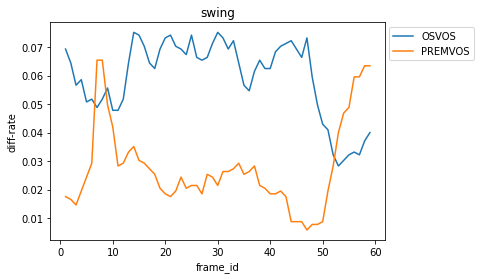

In [40]:
ax = sns.lineplot(x="frame_id",
    y="diff-rate",
    hue="VOS-method",
    data=similarity,
    legend='full')
ax.set_title('swing')
ax.legend(bbox_to_anchor=(1.28, 1))